In [4]:
import os,json, mplhep
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(mplhep.style.CMS)

def get_cutflow_data(user, analysis, sig_name, ver, years, mass_points, suffix=''):

    FilterDict = {}
    def flatten_dict(d, parent_key='', sep='_'):
        items = []
        for k, v in d.items():
            new_key = f"{parent_key}{sep}{k}" if parent_key else k
            if isinstance(v, dict):
                items.extend(flatten_dict(v, new_key, sep=sep).items())
            else:
                items.append((new_key, v))
        return dict(items)

    for i, mass in enumerate(mass_points):

        data = Counter()

        for year in years:
            basedir = f'/data_CMS/cms/{user}/cmt/MergeCutFlow/'
            datadir = basedir + f'ul_{year}_{analysis}_v12/{sig_name}_M{mass}{suffix}/cat_base_selection/{ver}'
            json_path = datadir + '/cut_flow.json'
            # print(" ### INFO: Reading file", json_path)
            if not os.path.exists(json_path): print(" *ERROR*: File not found")

            with open(json_path, 'r') as json_file:
                data_mass_year = json.load(json_file)
            data += Counter(flatten_dict(data_mass_year))

        FilterDict[mass] = dict(data)

    return FilterDict

user = "vernazza"
outdir = f"/grid_mnt/data__data.polcms/cms/{user}/FrameworkNanoAOD/hhbbtt-analysis/nicePlots/CutFlow/{ver}/"
os.system(" mkdir -p " + outdir)

0

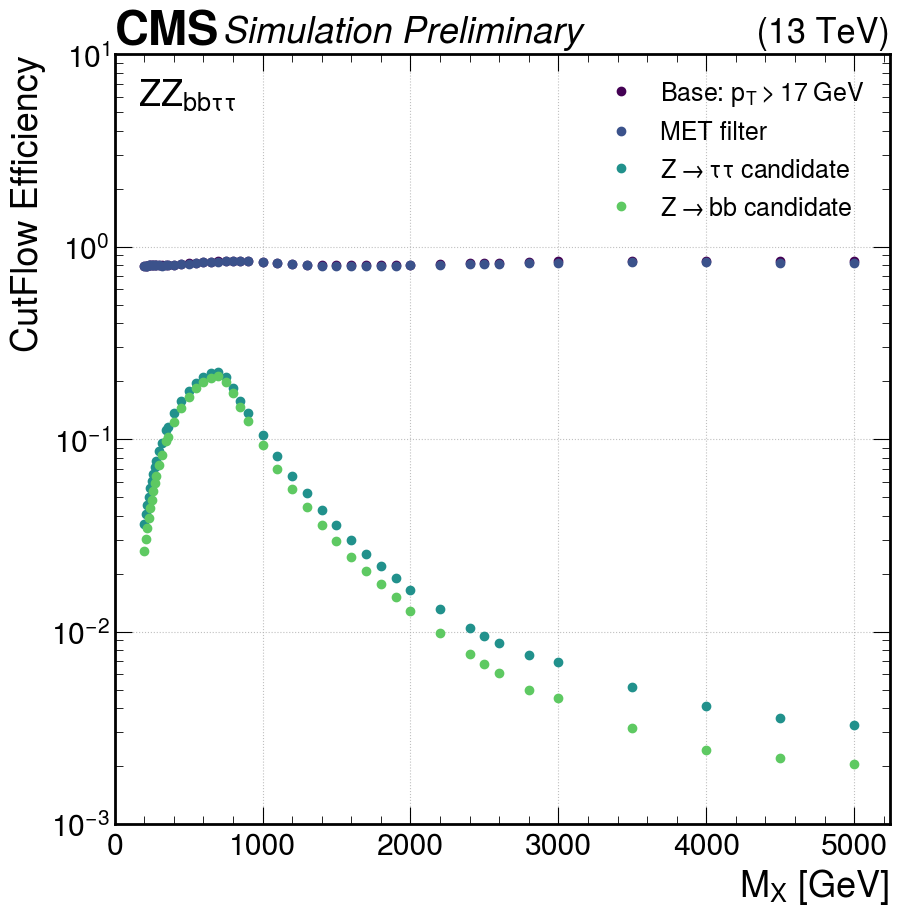

In [95]:
analysis = "ZZ"
fancy_name = r"$ZZ_{bb\tau\tau}$"
res_mass = "X"
sig_name = "GluGluToXToZZTo2B2Tau"
ver = "prod_240517"
years = ["2016", "2016_HIPM", "2017", "2018"]
mass_points = [ 200, 210, 220, 230, 240, 250, 260, 270, 280, 300, 320, 350, 360, 400, 450, 500, 550,
                600, 650, 700, 750, 800, 850, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700,
                1800, 1900, 2000, 2200, 2400, 2500, 2600, 2800, 3000, 3500, 4000, 4500, 5000]

FancyNames = {
    "base_selection": r"Base: $p_{T} > 17\;GeV$",
    "METFilterRDF": r"MET filter",
    "HHLeptonRDF": r"$Z \rightarrow \tau\tau$ candidate",
    "HHJetsRDF": r"$Z \rightarrow bb$ candidate",
}

FilterDict = get_cutflow_data(user, analysis, sig_name, ver, years, mass_points)

fig, ax = plt.subplots(figsize=(10,10))
cmap = plt.get_cmap('viridis')
for i, filter_name in enumerate(FancyNames.keys()):
    CutEff = [FilterDict[mass][f'{filter_name}_pass']/FilterDict[mass][f'base_selection_all'] for mass in mass_points]
    ax.errorbar(mass_points, CutEff, label=FancyNames[filter_name], lw=2, linestyle='', marker='o', color=cmap(i/len(FancyNames.keys())))
hep.cms.label("Preliminary")
plt.text(0.03, 0.97, fancy_name, ha="left", va="top", transform=plt.gca().transAxes, color="black")
plt.xlabel(rf"$M_{{{res_mass}}}$ [GeV]")
plt.ylabel(r"CutFlow Efficiency")
plt.grid()
plt.legend(loc='upper right', fontsize=18)
plt.xlim(0,None)
plt.ylim(None,1.19)
plt.savefig(outdir + f'/{analysis}_CutFlow.png')
plt.savefig(outdir + f'/{analysis}_CutFlow.pdf')
plt.yscale('log')
plt.ylim(0.001,10)
plt.savefig(outdir + f'/{analysis}_CutFlowLogY.png')
plt.savefig(outdir + f'/{analysis}_CutFlowLogY.pdf')

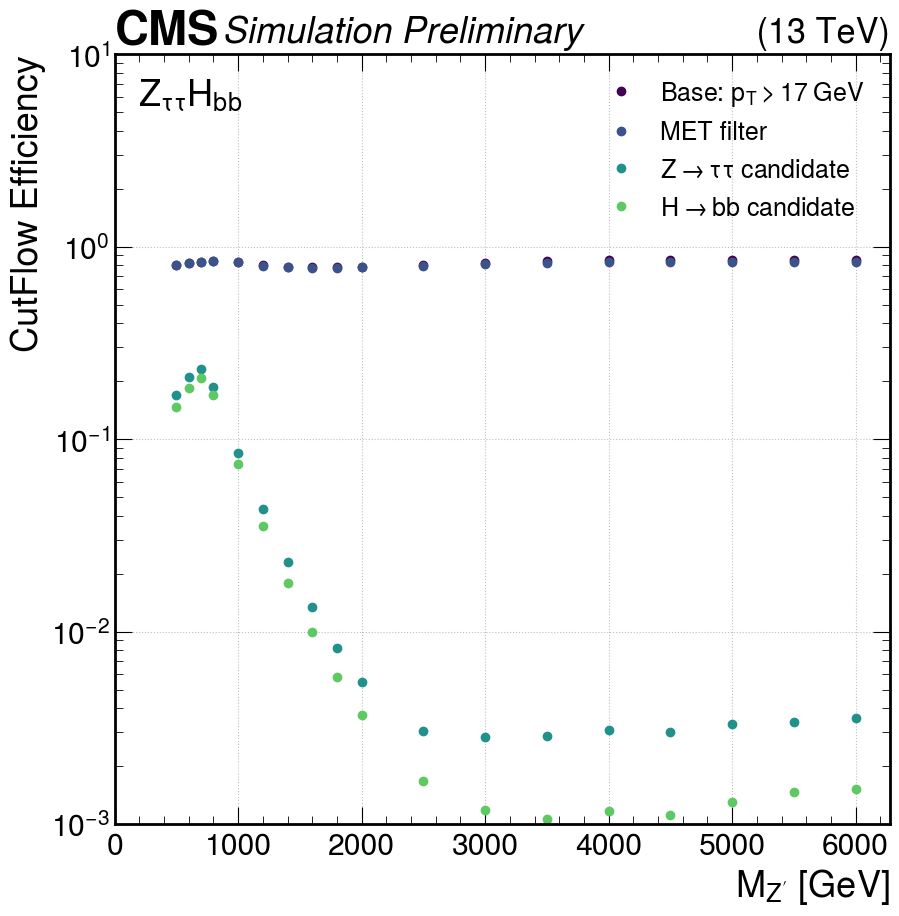

In [98]:
analysis = "ZttHbb"
fancy_name = r"$Z_{\tau\tau}H_{bb}$"
res_mass = "Z'"
sig_name = "ZprimeToZH_ZToTauTau_HToBB"
ver = "prod_240517"
years = ["2016", "2016_HIPM", "2017", "2018"]
mass_points = [500,600,700,800,1000,1200,1400,1600,1800,2000,2500,3000,3500,4000,4500,5000,5500,6000]

FancyNames = {
    "base_selection": r"Base: $p_{T} > 17\;GeV$",
    "METFilterRDF": r"MET filter",
    "HHLeptonRDF": r"$Z \rightarrow \tau\tau$ candidate",
    "HHJetsRDF": r"$H \rightarrow bb$ candidate",
}

FilterDict = get_cutflow_data(user, analysis, sig_name, ver, years, mass_points)

fig, ax = plt.subplots(figsize=(10,10))
cmap = plt.get_cmap('viridis')
for i, filter_name in enumerate(FancyNames.keys()):
    CutEff = [FilterDict[mass][f'{filter_name}_pass']/FilterDict[mass][f'base_selection_all'] for mass in mass_points]
    ax.errorbar(mass_points, CutEff, label=FancyNames[filter_name], lw=2, linestyle='', marker='o', color=cmap(i/len(FancyNames.keys())))
hep.cms.label("Preliminary")
plt.text(0.03, 0.97, fancy_name, ha="left", va="top", transform=plt.gca().transAxes, color="black")
plt.xlabel(rf"$M_{{{res_mass}}}$ [GeV]")
plt.ylabel(r"CutFlow Efficiency")
plt.grid()
plt.legend(loc='upper right', fontsize=18)
plt.xlim(0,None)
plt.ylim(None,1.19)
plt.savefig(outdir + f'/{analysis}_CutFlow.png')
plt.savefig(outdir + f'/{analysis}_CutFlow.pdf')
plt.yscale('log')
plt.ylim(0.001,10)
plt.savefig(outdir + f'/{analysis}_CutFlowLogY.png')
plt.savefig(outdir + f'/{analysis}_CutFlowLogY.pdf')

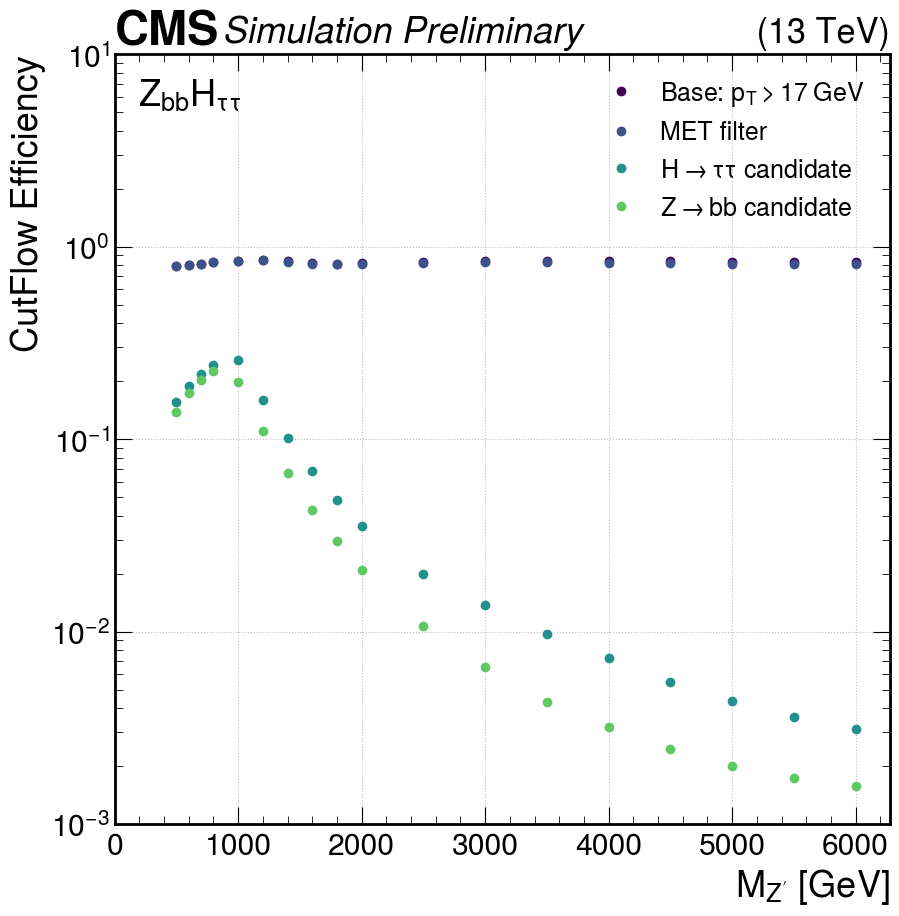

In [99]:
analysis = "ZbbHtt"
fancy_name = r"$Z_{bb}H_{\tau\tau}$"
res_mass = "Z'"
sig_name = "ZprimeToZH_ZToBB_HToTauTau"
ver = "prod_240517"
years = ["2016", "2016_HIPM", "2017", "2018"]
mass_points = [500,600,700,800,1000,1200,1400,1600,1800,2000,2500,3000,3500,4000,4500,5000,5500,6000]

FancyNames = {
    "base_selection": r"Base: $p_{T} > 17\;GeV$",
    "METFilterRDF": r"MET filter",
    "HHLeptonRDF": r"$H \rightarrow \tau\tau$ candidate",
    "HHJetsRDF": r"$Z \rightarrow bb$ candidate",
}

FilterDict = get_cutflow_data(user, analysis, sig_name, ver, years, mass_points)

fig, ax = plt.subplots(figsize=(10,10))
cmap = plt.get_cmap('viridis')
for i, filter_name in enumerate(FancyNames.keys()):
    CutEff = [FilterDict[mass][f'{filter_name}_pass']/FilterDict[mass][f'base_selection_all'] for mass in mass_points]
    ax.errorbar(mass_points, CutEff, label=FancyNames[filter_name], lw=2, linestyle='', marker='o', color=cmap(i/len(FancyNames.keys())))
hep.cms.label("Preliminary")
plt.text(0.03, 0.97, fancy_name, ha="left", va="top", transform=plt.gca().transAxes, color="black")
plt.xlabel(rf"$M_{{{res_mass}}}$ [GeV]")
plt.ylabel(r"CutFlow Efficiency")
plt.grid()
plt.legend(loc='upper right', fontsize=18)
plt.xlim(0,None)
plt.ylim(None,1.19)
plt.savefig(outdir + f'/{analysis}_CutFlow.png')
plt.savefig(outdir + f'/{analysis}_CutFlow.pdf')
plt.yscale('log')
plt.ylim(0.001,10)
plt.savefig(outdir + f'/{analysis}_CutFlowLogY.png')
plt.savefig(outdir + f'/{analysis}_CutFlowLogY.pdf')

# Study on boosted taus

(0.001, 10)

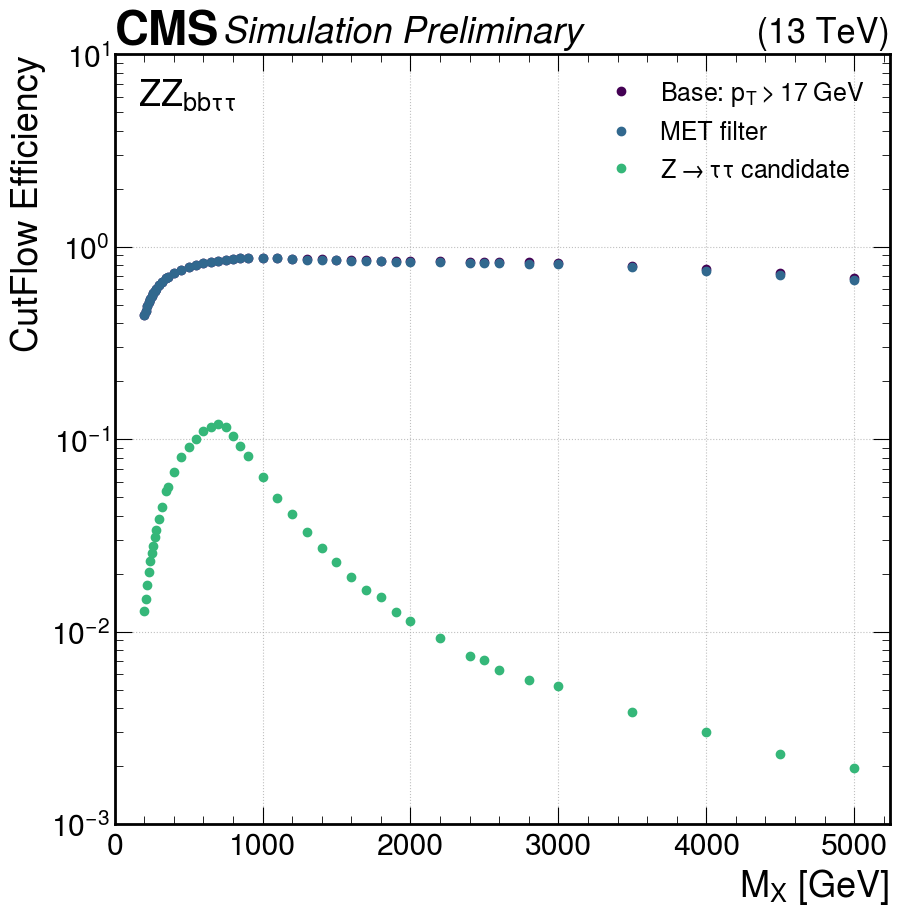

In [7]:
analysis = "ZZ"
fancy_name = r"$ZZ_{bb\tau\tau}$"
res_mass = "X"
sig_name = "GluGluToXToZZTo2B2Tau"
ver = "prod_240620_B"
years = ["2018"]
mass_points = [ 200, 210, 220, 230, 240, 250, 260, 270, 280, 300, 320, 350, 360, 400, 450, 500, 550,
                600, 650, 700, 750, 800, 850, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700,
                1800, 1900, 2000, 2200, 2400, 2500, 2600, 2800, 3000, 3500, 4000, 4500, 5000]

FancyNames = {
    "base_selection": r"Base: $p_{T} > 17\;GeV$",
    "METFilterRDF": r"MET filter",
    "HHLeptonRDF": r"$Z \rightarrow \tau\tau$ candidate",
    # "HHJetsRDF": r"$Z \rightarrow bb$ candidate",
}

FilterDict = get_cutflow_data(user, analysis, sig_name, ver, years, mass_points, suffix='_aux')

fig, ax = plt.subplots(figsize=(10,10))
cmap = plt.get_cmap('viridis')
for i, filter_name in enumerate(FancyNames.keys()):
    CutEff = [FilterDict[mass][f'{filter_name}_pass']/FilterDict[mass][f'base_selection_all'] for mass in mass_points]
    ax.errorbar(mass_points, CutEff, label=FancyNames[filter_name], lw=2, linestyle='', marker='o', color=cmap(i/len(FancyNames.keys())))
hep.cms.label("Preliminary")
plt.text(0.03, 0.97, fancy_name, ha="left", va="top", transform=plt.gca().transAxes, color="black")
plt.xlabel(rf"$M_{{{res_mass}}}$ [GeV]")
plt.ylabel(r"CutFlow Efficiency")
plt.grid()
plt.legend(loc='upper right', fontsize=18)
plt.xlim(0,None)
plt.ylim(None,1.19)
# plt.savefig(outdir + f'/{analysis}_CutFlow.png')
# plt.savefig(outdir + f'/{analysis}_CutFlow.pdf')
plt.yscale('log')
plt.ylim(0.001,10)
# plt.savefig(outdir + f'/{analysis}_CutFlowLogY.png')
# plt.savefig(outdir + f'/{analysis}_CutFlowLogY.pdf')

(0.001, 10)

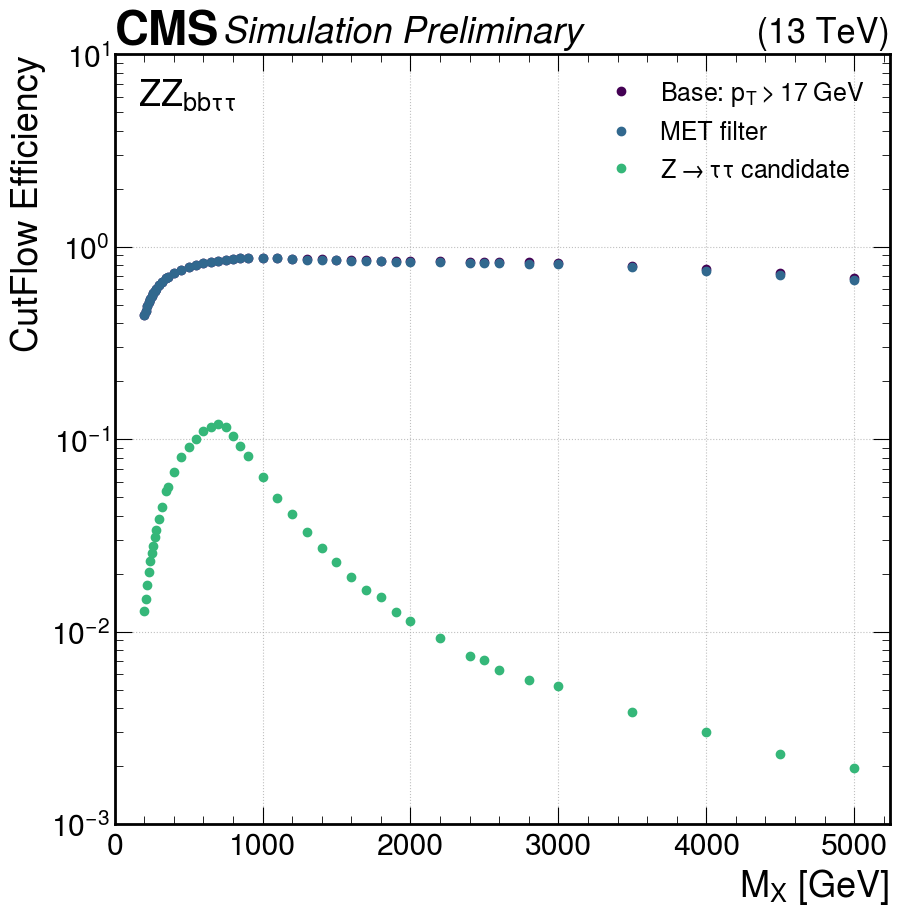

In [8]:
analysis = "ZZ"
fancy_name = r"$ZZ_{bb\tau\tau}$"
res_mass = "X"
sig_name = "GluGluToXToZZTo2B2Tau"
ver = "prod_240620_C"
years = ["2018"]
mass_points = [ 200, 210, 220, 230, 240, 250, 260, 270, 280, 300, 320, 350, 360, 400, 450, 500, 550,
                600, 650, 700, 750, 800, 850, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700,
                1800, 1900, 2000, 2200, 2400, 2500, 2600, 2800, 3000, 3500, 4000, 4500, 5000]

FancyNames = {
    "base_selection": r"Base: $p_{T} > 17\;GeV$",
    "METFilterRDF": r"MET filter",
    "HHLeptonRDF": r"$Z \rightarrow \tau\tau$ candidate",
    # "HHJetsRDF": r"$Z \rightarrow bb$ candidate",
}

FilterDict = get_cutflow_data(user, analysis, sig_name, ver, years, mass_points, suffix='_aux')

fig, ax = plt.subplots(figsize=(10,10))
cmap = plt.get_cmap('viridis')
for i, filter_name in enumerate(FancyNames.keys()):
    CutEff = [FilterDict[mass][f'{filter_name}_pass']/FilterDict[mass][f'base_selection_all'] for mass in mass_points]
    ax.errorbar(mass_points, CutEff, label=FancyNames[filter_name], lw=2, linestyle='', marker='o', color=cmap(i/len(FancyNames.keys())))
hep.cms.label("Preliminary")
plt.text(0.03, 0.97, fancy_name, ha="left", va="top", transform=plt.gca().transAxes, color="black")
plt.xlabel(rf"$M_{{{res_mass}}}$ [GeV]")
plt.ylabel(r"CutFlow Efficiency")
plt.grid()
plt.legend(loc='upper right', fontsize=18)
plt.xlim(0,None)
plt.ylim(None,1.19)
# plt.savefig(outdir + f'/{analysis}_CutFlow.png')
# plt.savefig(outdir + f'/{analysis}_CutFlow.pdf')
plt.yscale('log')
plt.ylim(0.001,10)
# plt.savefig(outdir + f'/{analysis}_CutFlowLogY.png')
# plt.savefig(outdir + f'/{analysis}_CutFlowLogY.pdf')

(0.001, 10)

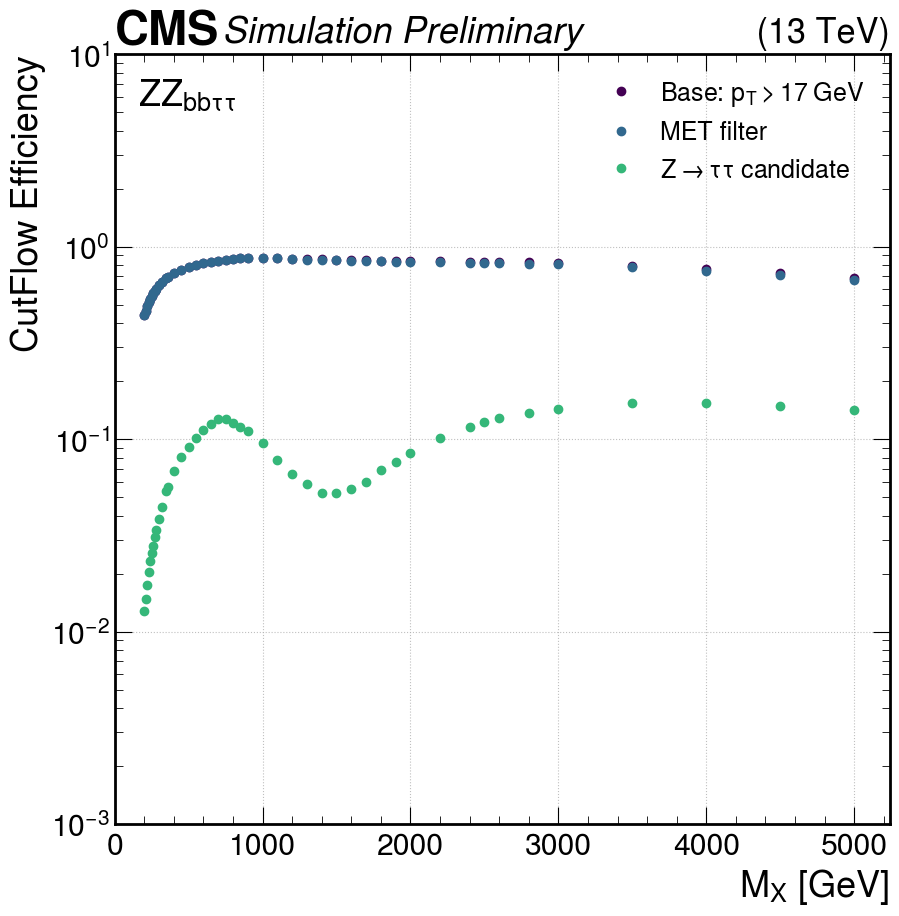

In [10]:
analysis = "ZZ"
fancy_name = r"$ZZ_{bb\tau\tau}$"
res_mass = "X"
sig_name = "GluGluToXToZZTo2B2Tau"
ver = "prod_240620_D"
years = ["2018"]
mass_points = [ 200, 210, 220, 230, 240, 250, 260, 270, 280, 300, 320, 350, 360, 400, 450, 500, 550,
                600, 650, 700, 750, 800, 850, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700,
                1800, 1900, 2000, 2200, 2400, 2500, 2600, 2800, 3000, 3500, 4000, 4500, 5000]

FancyNames = {
    "base_selection": r"Base: $p_{T} > 17\;GeV$",
    "METFilterRDF": r"MET filter",
    "HHLeptonRDF": r"$Z \rightarrow \tau\tau$ candidate",
    # "HHJetsRDF": r"$Z \rightarrow bb$ candidate",
}

FilterDict = get_cutflow_data(user, analysis, sig_name, ver, years, mass_points, suffix='_aux')

fig, ax = plt.subplots(figsize=(10,10))
cmap = plt.get_cmap('viridis')
for i, filter_name in enumerate(FancyNames.keys()):
    CutEff = [FilterDict[mass][f'{filter_name}_pass']/FilterDict[mass][f'base_selection_all'] for mass in mass_points]
    ax.errorbar(mass_points, CutEff, label=FancyNames[filter_name], lw=2, linestyle='', marker='o', color=cmap(i/len(FancyNames.keys())))
hep.cms.label("Preliminary")
plt.text(0.03, 0.97, fancy_name, ha="left", va="top", transform=plt.gca().transAxes, color="black")
plt.xlabel(rf"$M_{{{res_mass}}}$ [GeV]")
plt.ylabel(r"CutFlow Efficiency")
plt.grid()
plt.legend(loc='upper right', fontsize=18)
plt.xlim(0,None)
plt.yscale('log')
plt.ylim(0.001,10)

(0.001, 10)

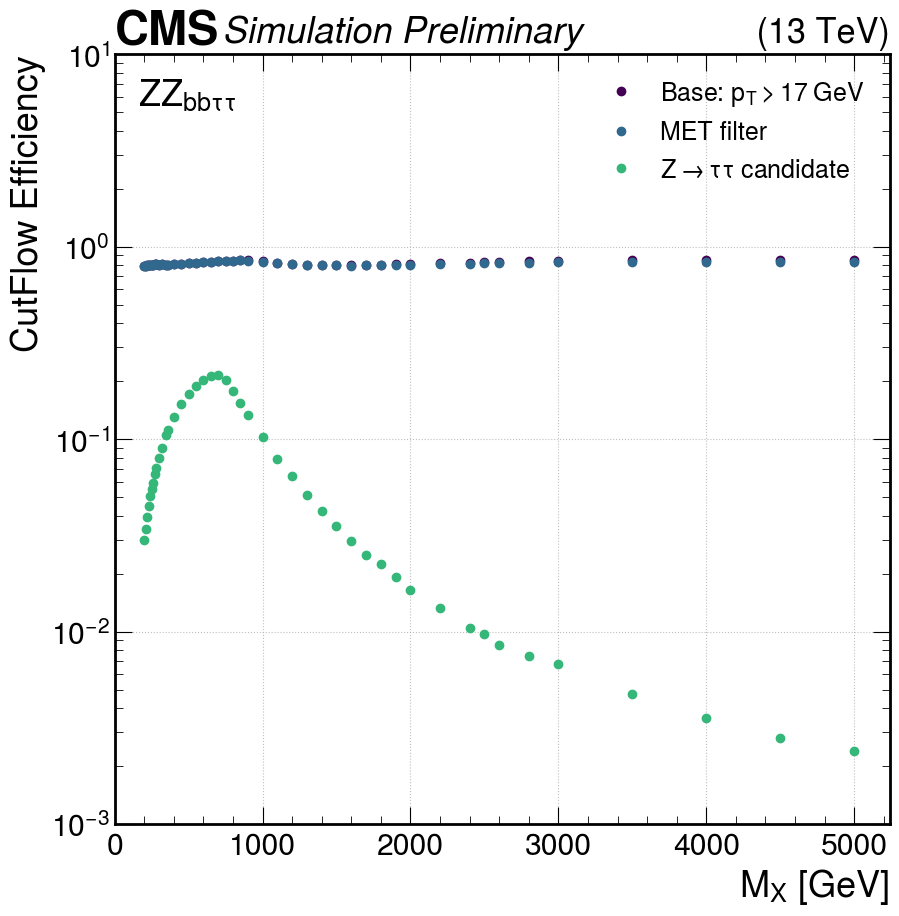

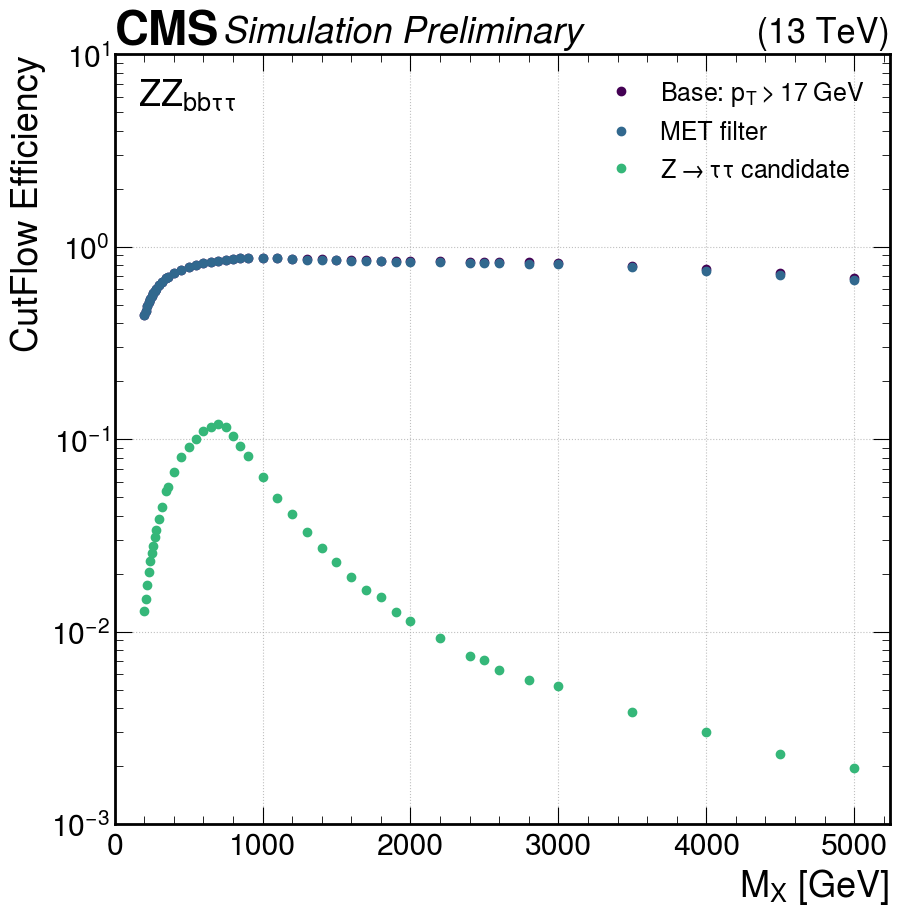

In [17]:
analysis = "ZZ"
fancy_name = r"$ZZ_{bb\tau\tau}$"
res_mass = "X"
sig_name = "GluGluToXToZZTo2B2Tau"
ver = "prod_240620_A"
years = ["2018"]
mass_points = [ 200, 210, 220, 230, 240, 250, 260, 270, 280, 300, 320, 350, 360, 400, 450, 500, 550,
                600, 650, 700, 750, 800, 850, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700,
                1800, 1900, 2000, 2200, 2400, 2500, 2600, 2800, 3000, 3500, 4000, 4500, 5000]

FancyNames = {
    "base_selection": r"Base: $p_{T} > 17\;GeV$",
    "METFilterRDF": r"MET filter",
    "HHLeptonRDF": r"$Z \rightarrow \tau\tau$ candidate",
    # "HHJetsRDF": r"$Z \rightarrow bb$ candidate",
}

FilterDict_v12 = get_cutflow_data(user, analysis, sig_name, ver, years, mass_points, suffix='')

fig, ax = plt.subplots(figsize=(10,10))
cmap = plt.get_cmap('viridis')
for i, filter_name in enumerate(FancyNames.keys()):
    CutEff = [FilterDict_v12[mass][f'{filter_name}_pass']/FilterDict_v12[mass][f'base_selection_all'] for mass in mass_points]
    ax.errorbar(mass_points, CutEff, label=FancyNames[filter_name], lw=2, linestyle='', marker='o', color=cmap(i/len(FancyNames.keys())))
hep.cms.label("Preliminary")
plt.text(0.03, 0.97, fancy_name, ha="left", va="top", transform=plt.gca().transAxes, color="black")
plt.xlabel(rf"$M_{{{res_mass}}}$ [GeV]")
plt.ylabel(r"CutFlow Efficiency")
plt.grid()
plt.legend(loc='upper right', fontsize=18)
plt.xlim(0,None)
plt.yscale('log')
plt.ylim(0.001,10)

ver = "prod_240620_B"
FilterDict_v9 = get_cutflow_data(user, analysis, sig_name, ver, years, mass_points, suffix='_aux')

fig, ax = plt.subplots(figsize=(10,10))
cmap = plt.get_cmap('viridis')
for i, filter_name in enumerate(FancyNames.keys()):
    CutEff = [FilterDict_v9[mass][f'{filter_name}_pass']/FilterDict_v9[mass][f'base_selection_all'] for mass in mass_points]
    ax.errorbar(mass_points, CutEff, label=FancyNames[filter_name], lw=2, linestyle='', marker='o', color=cmap(i/len(FancyNames.keys())))
hep.cms.label("Preliminary")
plt.text(0.03, 0.97, fancy_name, ha="left", va="top", transform=plt.gca().transAxes, color="black")
plt.xlabel(rf"$M_{{{res_mass}}}$ [GeV]")
plt.ylabel(r"CutFlow Efficiency")
plt.grid()
plt.legend(loc='upper right', fontsize=18)
plt.xlim(0,None)
plt.yscale('log')
plt.ylim(0.001,10)

(0.001, 10)

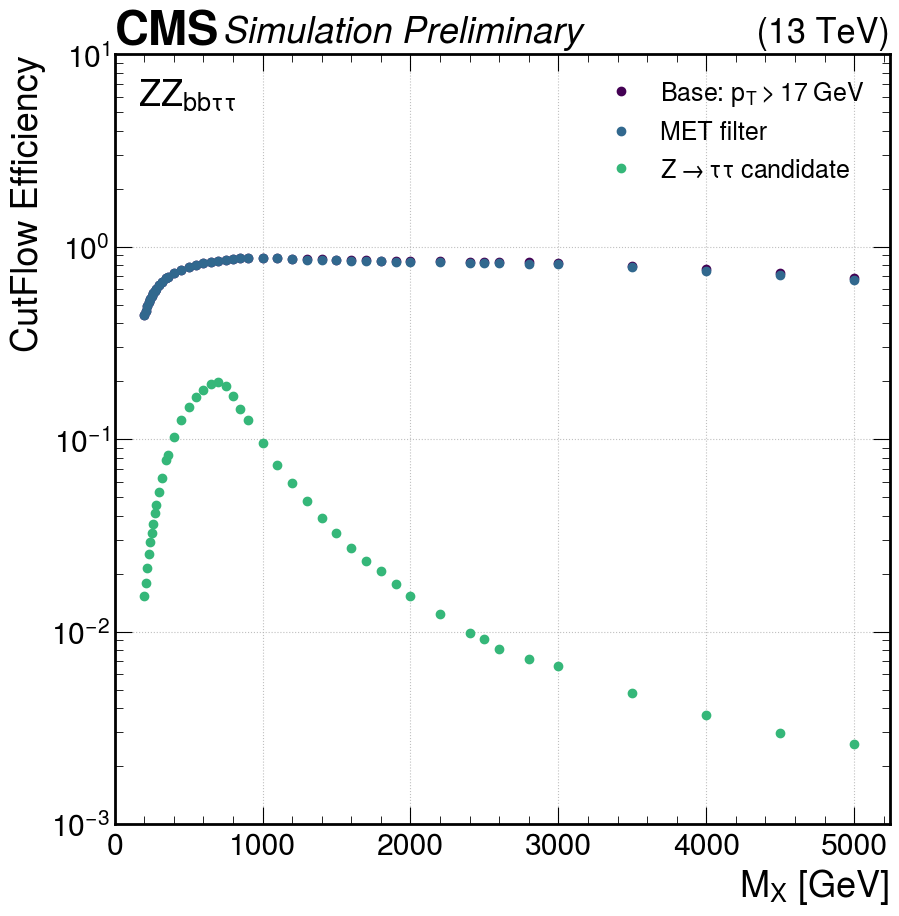

In [18]:
ver = "prod_240621_C"
FilterDict_v9 = get_cutflow_data(user, analysis, sig_name, ver, years, mass_points, suffix='_aux')

fig, ax = plt.subplots(figsize=(10,10))
cmap = plt.get_cmap('viridis')
for i, filter_name in enumerate(FancyNames.keys()):
    CutEff = [FilterDict_v9[mass][f'{filter_name}_pass']/FilterDict_v9[mass][f'base_selection_all'] for mass in mass_points]
    ax.errorbar(mass_points, CutEff, label=FancyNames[filter_name], lw=2, linestyle='', marker='o', color=cmap(i/len(FancyNames.keys())))
hep.cms.label("Preliminary")
plt.text(0.03, 0.97, fancy_name, ha="left", va="top", transform=plt.gca().transAxes, color="black")
plt.xlabel(rf"$M_{{{res_mass}}}$ [GeV]")
plt.ylabel(r"CutFlow Efficiency")
plt.grid()
plt.legend(loc='upper right', fontsize=18)
plt.xlim(0,None)
plt.yscale('log')
plt.ylim(0.001,10)

(0.001, 10)

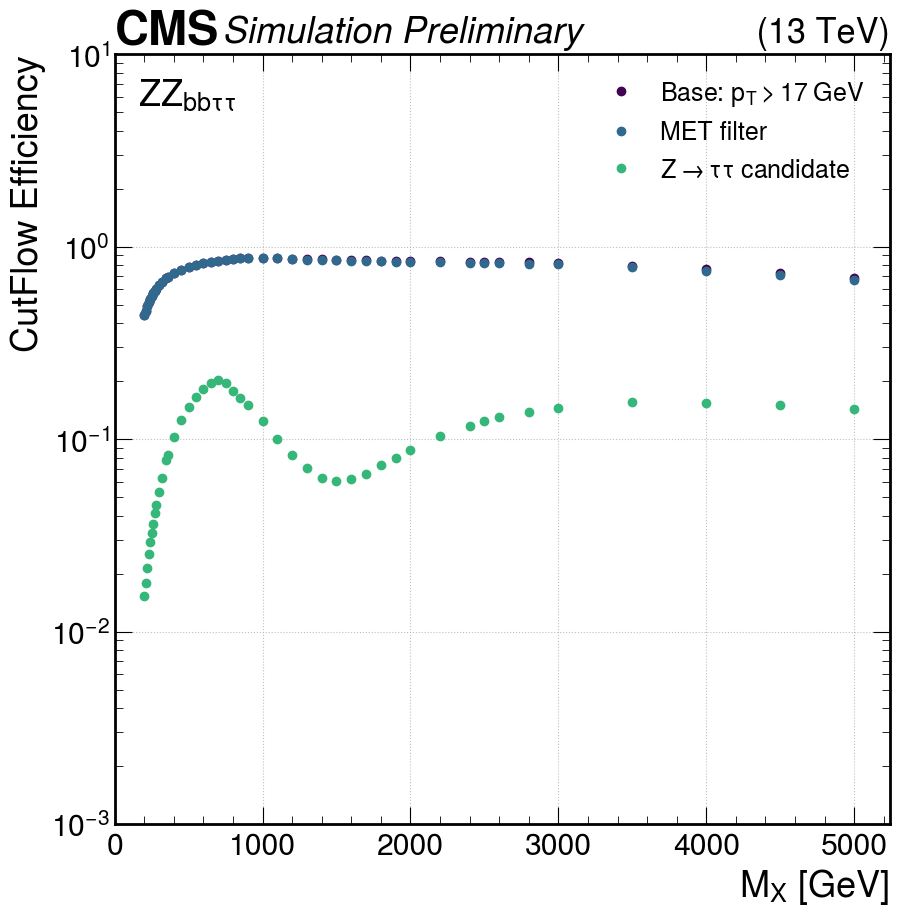

In [19]:
ver = "prod_240621_D"
FilterDict_v9 = get_cutflow_data(user, analysis, sig_name, ver, years, mass_points, suffix='_aux')

fig, ax = plt.subplots(figsize=(10,10))
cmap = plt.get_cmap('viridis')
for i, filter_name in enumerate(FancyNames.keys()):
    CutEff = [FilterDict_v9[mass][f'{filter_name}_pass']/FilterDict_v9[mass][f'base_selection_all'] for mass in mass_points]
    ax.errorbar(mass_points, CutEff, label=FancyNames[filter_name], lw=2, linestyle='', marker='o', color=cmap(i/len(FancyNames.keys())))
hep.cms.label("Preliminary")
plt.text(0.03, 0.97, fancy_name, ha="left", va="top", transform=plt.gca().transAxes, color="black")
plt.xlabel(rf"$M_{{{res_mass}}}$ [GeV]")
plt.ylabel(r"CutFlow Efficiency")
plt.grid()
plt.legend(loc='upper right', fontsize=18)
plt.xlim(0,None)
plt.yscale('log')
plt.ylim(0.001,10)